In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

import yfinance as yf
# For time stamps
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Define the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Download Apple stock data
apple_data = yf.download(ticker_symbol, start="2019-10-24", end="2024-10-24")  # Define your desired date range

# Display the first few rows of data
print(apple_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-10-24  61.127499  61.200001  60.452499  60.895000  58.859928   69275200
2019-10-25  60.790001  61.682499  60.720001  61.645000  59.584862   73477200
2019-10-28  61.855000  62.312500  61.680000  62.262501  60.181725   96572800
2019-10-29  62.242500  62.437500  60.642502  60.822498  58.789848  142839600
2019-10-30  61.189999  61.325001  60.302502  60.814999  58.782593  124522000


In [43]:
apple_data.shape

(1258, 6)

In [44]:
# Now you can access the 'year' attribute
apple_data['Year'] = apple_data.index.year
apple_data['Month'] = apple_data.index.month

# Name the index column
apple_data.index.name = 'Date'

In [45]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2019-10-24,61.127499,61.200001,60.452499,60.895000,58.859928,69275200,2019,10
2019-10-25,60.790001,61.682499,60.720001,61.645000,59.584862,73477200,2019,10
2019-10-28,61.855000,62.312500,61.680000,62.262501,60.181725,96572800,2019,10
2019-10-29,62.242500,62.437500,60.642502,60.822498,58.789848,142839600,2019,10
2019-10-30,61.189999,61.325001,60.302502,60.814999,58.782593,124522000,2019,10
...,...,...,...,...,...,...,...,...
2024-10-17,233.429993,233.850006,230.520004,232.149994,231.894867,32993800,2024,10
2024-10-18,236.179993,236.179993,234.009995,235.000000,234.741730,46431500,2024,10
2024-10-21,234.449997,236.850006,234.449997,236.479996,236.220108,36254500,2024,10


# Data Processing

In [46]:
apple_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Year           int32
Month          int32
dtype: object

In [47]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,147.581352,149.223581,146.041675,147.714477,145.875367,9.272452e+07,2021.810016,6.548490
std,41.267626,41.497238,41.006542,41.262449,41.747666,5.287611e+07,1.468739,3.432442
min,57.020000,57.125000,53.152500,56.092499,54.509754,2.404830e+07,2019.000000,1.000000
25%,125.034998,126.446873,123.871874,125.062498,122.700300,5.784518e+07,2021.000000,4.000000
50%,149.404999,151.184998,147.840004,149.705002,147.577560,7.875405e+07,2022.000000,7.000000
75%,175.030006,176.724998,173.472496,175.075001,173.122879,1.093357e+08,2023.000000,10.000000
max,236.479996,237.490005,234.449997,236.479996,236.220108,4.265100e+08,2024.000000,12.000000


In [48]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-24 to 2024-10-23
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Year       1258 non-null   int32  
 7   Month      1258 non-null   int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 78.6 KB


In [49]:
apple_data.duplicated().sum()

0

In [50]:
apple_data["Close"]=round(apple_data["Close"],2)
apple_data

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2019-10-24,61.127499,61.200001,60.452499,60.90,58.859928,69275200,2019,10
2019-10-25,60.790001,61.682499,60.720001,61.65,59.584862,73477200,2019,10
2019-10-28,61.855000,62.312500,61.680000,62.26,60.181725,96572800,2019,10
2019-10-29,62.242500,62.437500,60.642502,60.82,58.789848,142839600,2019,10
2019-10-30,61.189999,61.325001,60.302502,60.81,58.782593,124522000,2019,10
...,...,...,...,...,...,...,...,...
2024-10-17,233.429993,233.850006,230.520004,232.15,231.894867,32993800,2024,10
2024-10-18,236.179993,236.179993,234.009995,235.00,234.741730,46431500,2024,10
2024-10-21,234.449997,236.850006,234.449997,236.48,236.220108,36254500,2024,10


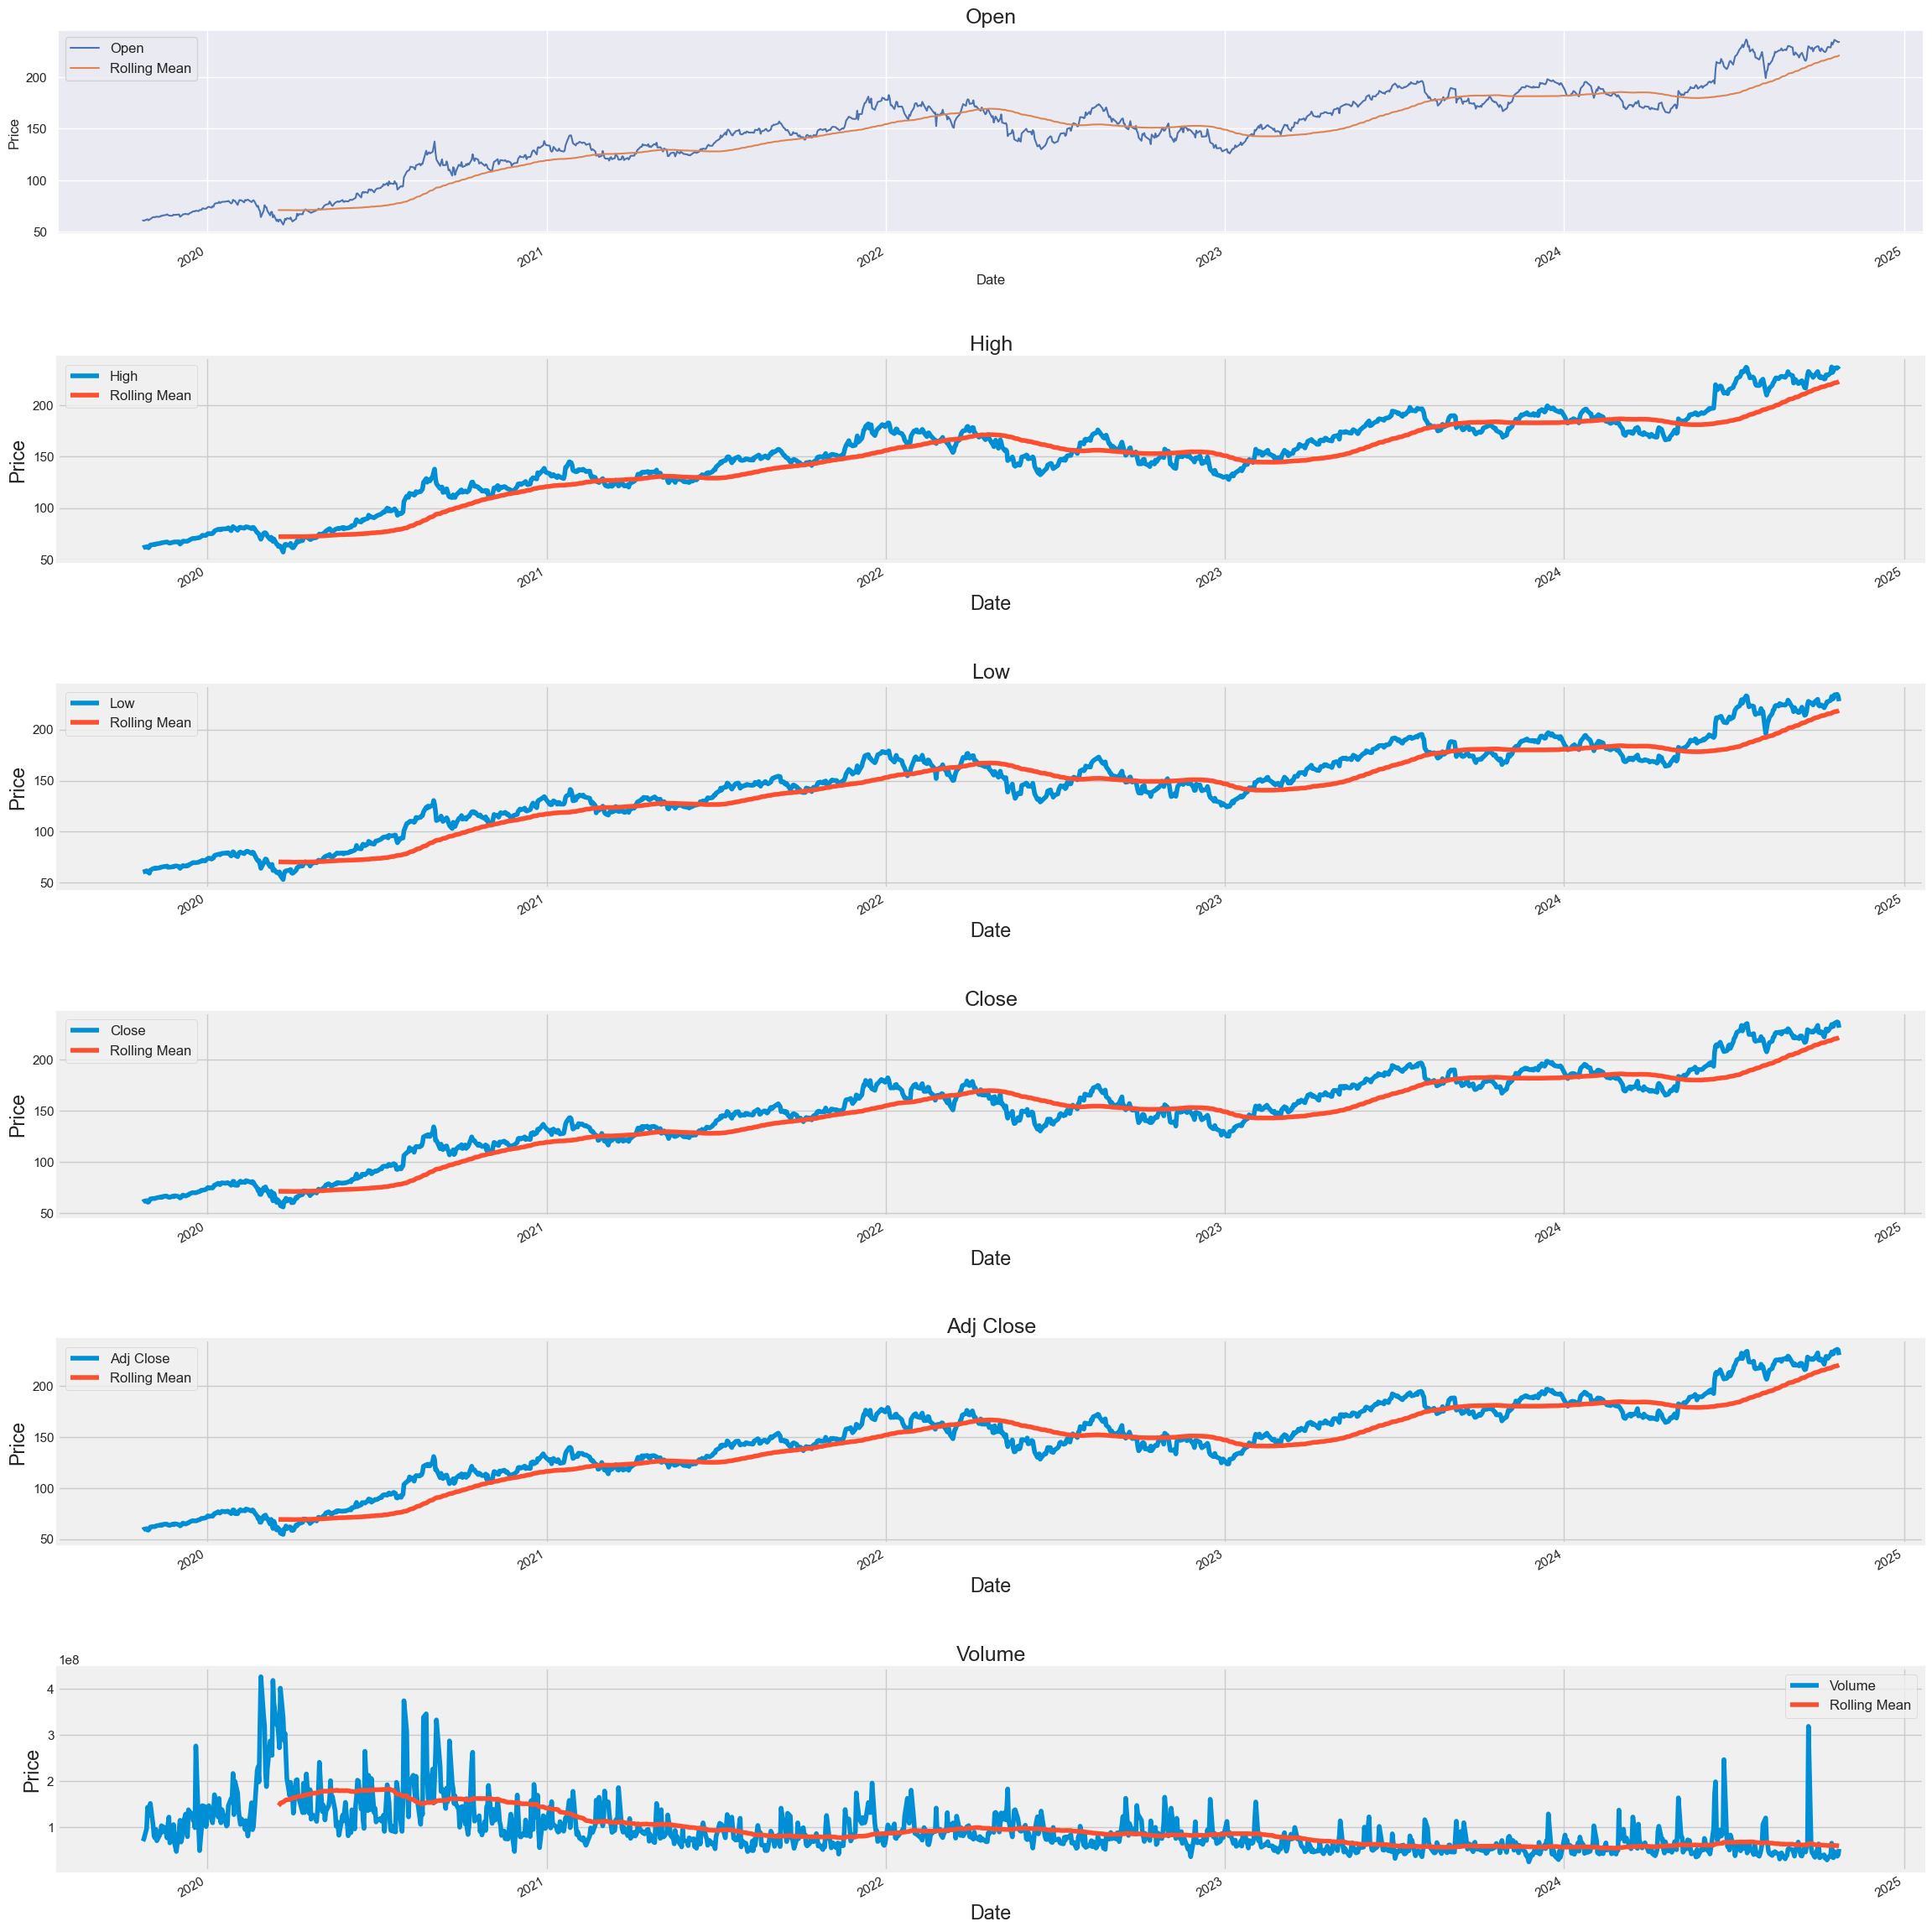

In [51]:
import matplotlib.pyplot as plt
col_names = apple_data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(apple_data.iloc[:,i],label=col_names[i])
  apple_data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

## Inference from rolling mean of each column
##### Open,High ,Low ,Close and Adjusted Close is showing increasing Trend but Volume has a zigzag movement more in year 2020 because of Covid.So fluctuations in volume are observed during year 2020 more comparative to upcoming years





# Feature Selection

In [52]:
apple_data.corr()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Open,1.000000,0.999378,0.999372,0.998616,0.998511,-0.592357,0.883238,0.071775
High,0.999378,1.000000,0.999207,0.999368,0.999227,-0.583629,0.883734,0.070533
Low,0.999372,0.999207,1.000000,0.999368,0.999301,-0.601899,0.884409,0.071953
Close,0.998616,0.999368,0.999368,1.000000,0.999884,-0.593414,0.884034,0.071489
Adj Close,0.998511,0.999227,0.999301,0.999884,1.000000,-0.594253,0.889412,0.070712
Volume,-0.592357,-0.583629,-0.601899,-0.593414,-0.594253,1.000000,-0.568644,-0.104514
Year,0.883238,0.883734,0.884409,0.884034,0.889412,-0.568644,1.000000,-0.180198
Month,0.071775,0.070533,0.071953,0.071489,0.070712,-0.104514,-0.180198,1.000000


In [53]:
##Data after feature selection
data_selected = apple_data.drop(axis=1,labels=['Open','High','Low','Adj Close','Volume','Year','Month'])

In [54]:
data_selected

,Close
Date,
2019-10-24,60.90
2019-10-25,61.65
2019-10-28,62.26
2019-10-29,60.82
2019-10-30,60.81
...,...
2024-10-17,232.15
2024-10-18,235.00
2024-10-21,236.48


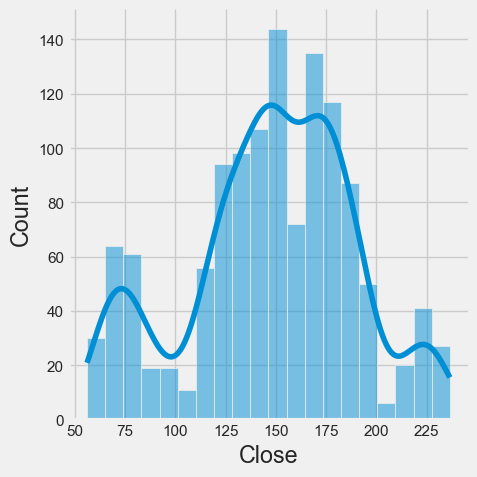

In [55]:
import seaborn as sns
sns.displot(data_selected["Close"], kde='True')

#### Above graph shows that the Close figure is approximate around 150

<Axes: xlabel='Year', ylabel='Close'>

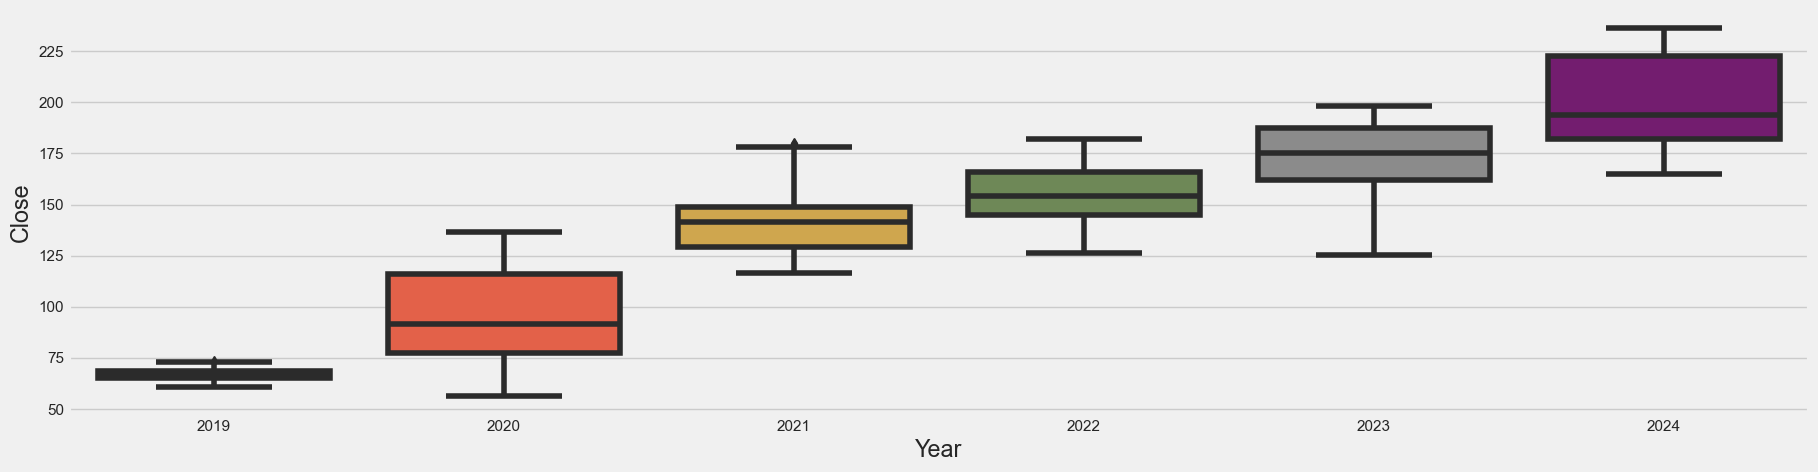

In [56]:
# Box Plots (monthly)
fig,ax = plt.subplots(figsize=(20,5))
sns.boxplot(x =apple_data['Year'] , 
                y = apple_data['Close'], 
                ax = ax)

#### Above boxplot indicates that there is a significant difference in close price between year 2019 and 2020 ,it must be because of covid.But after that there is slow increasing graph of closing price


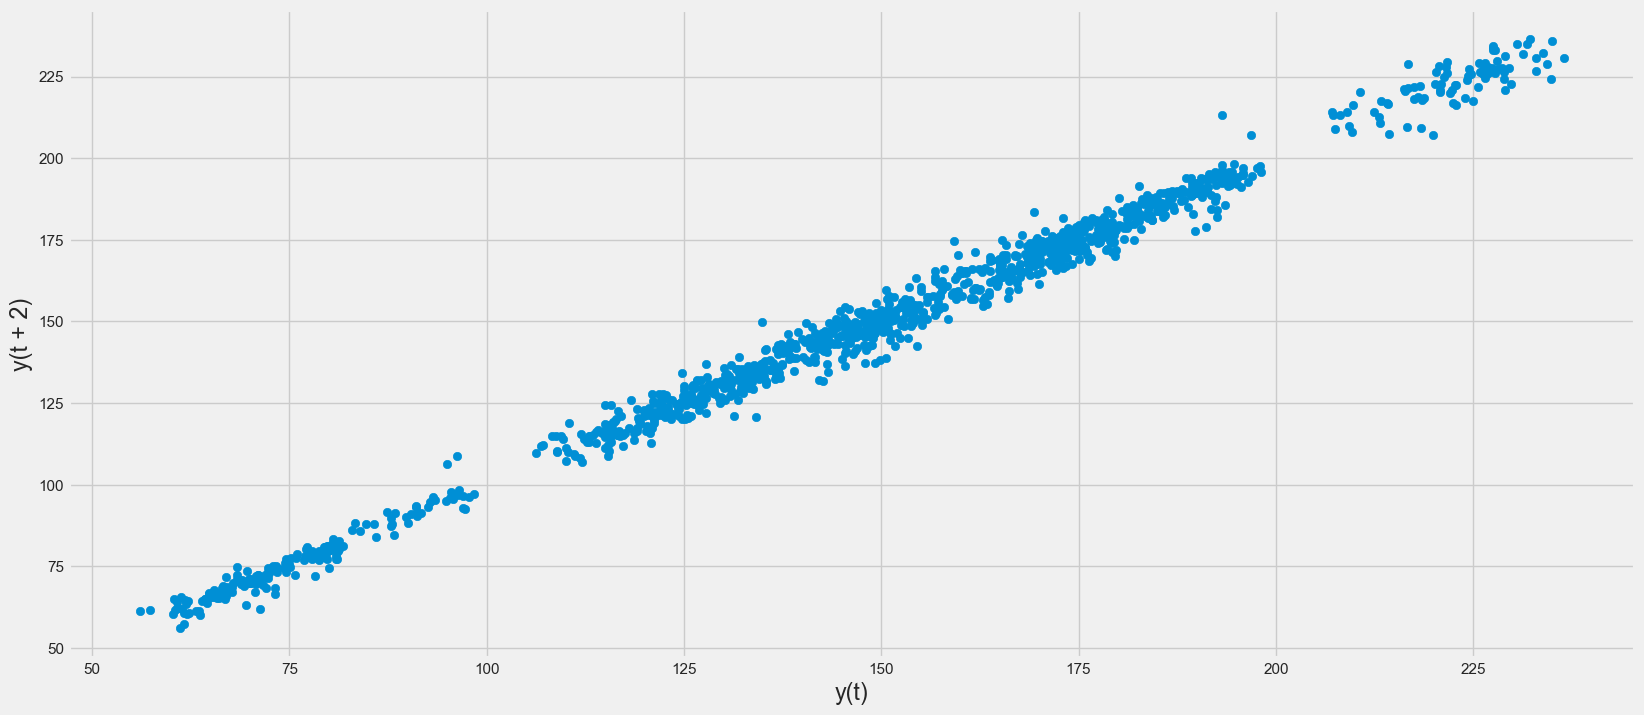

In [57]:
from pandas.plotting import lag_plot
lag_plot(data_selected['Close'], lag=2)
plt.show()

#### As clustered along a diagonal line, it suggests a linear correlation between the current value of the series and the value from two time steps back.


# Resampling

In [58]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_selected['Close'].resample('M').mean()

In [59]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2019-10-31,61.438333
2019-11-30,65.630500
2019-12-31,69.130000
2020-01-31,77.979524
2020-02-29,77.816842
...,...
2024-06-30,206.263158
2024-07-31,224.598636
2024-08-31,221.638182


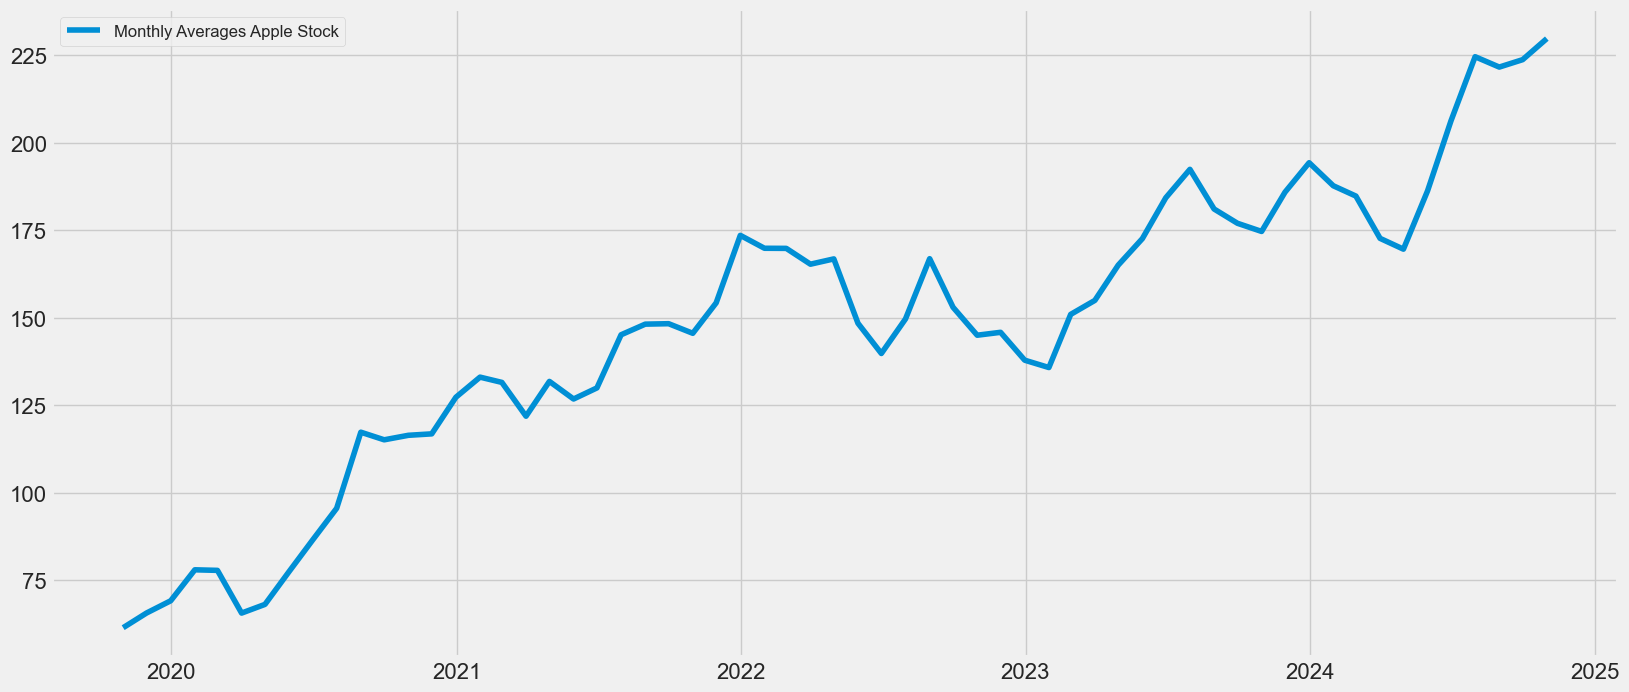

In [60]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012'),
  Text(0, 0.014, '0.014')])

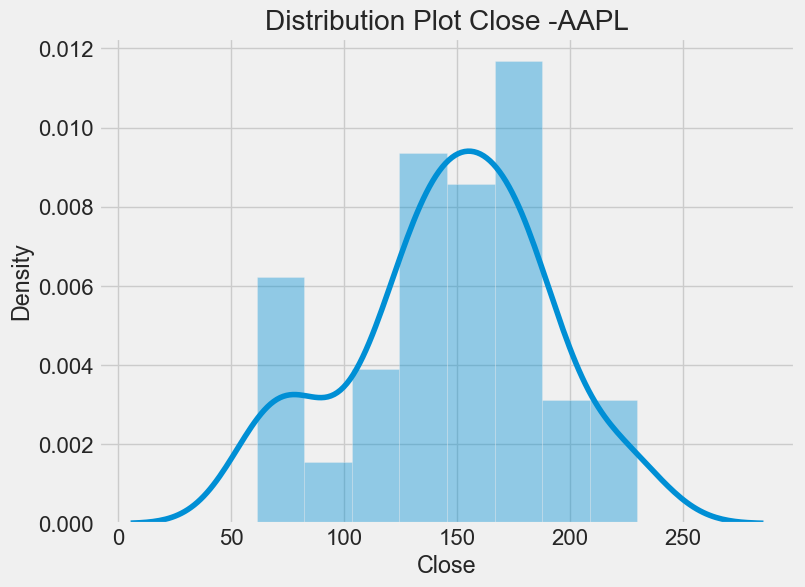

In [61]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(8,6))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#### Above distribution shows slightly left skewed

# Decomposition of Time Series

<Figure size 2000x1600 with 0 Axes>

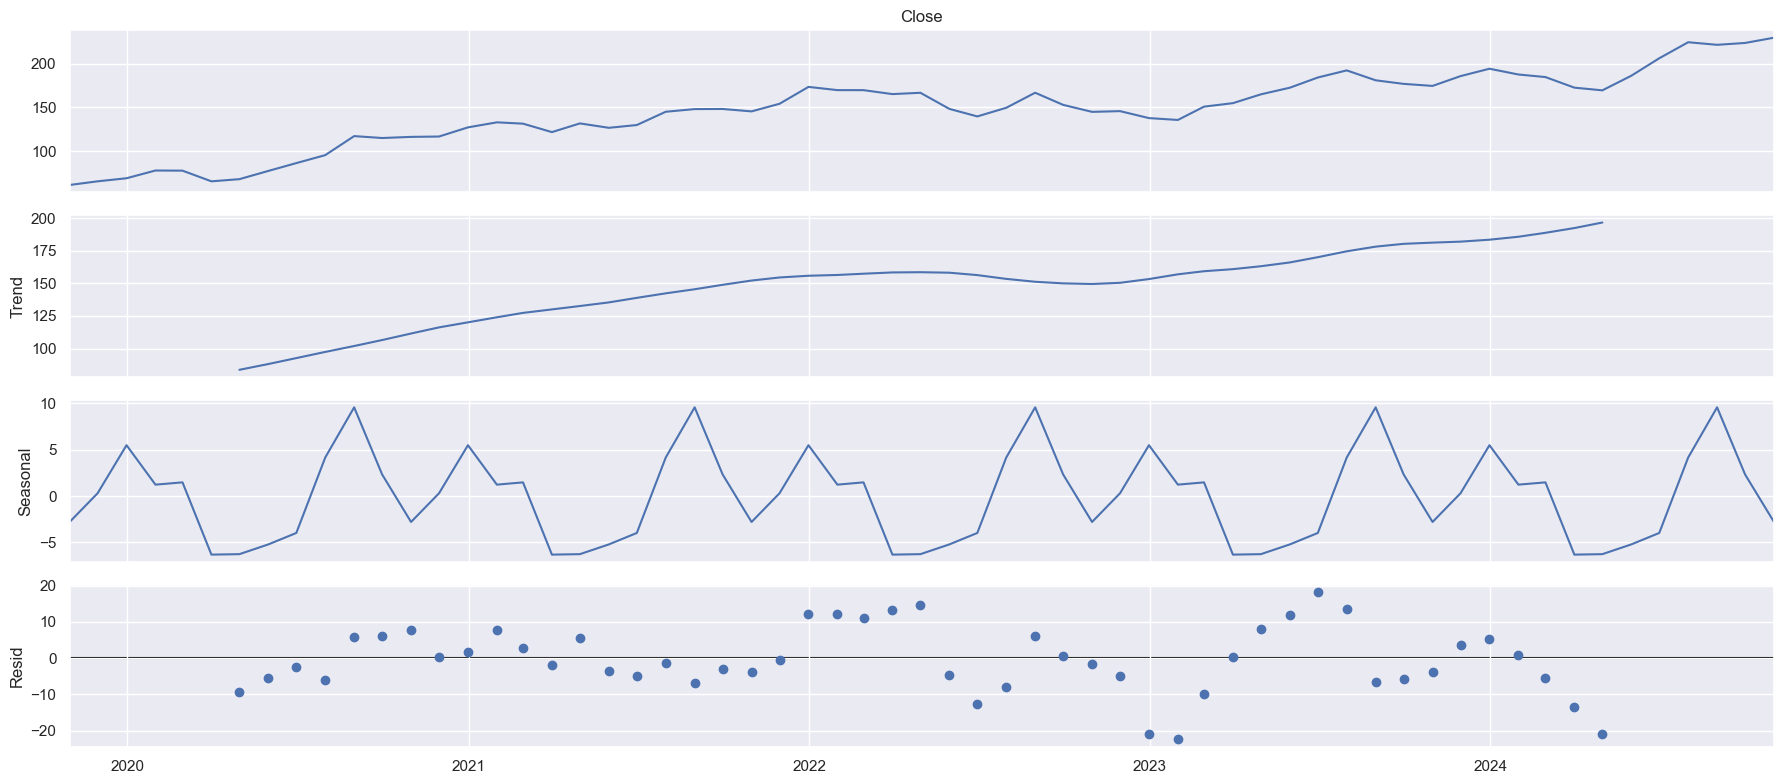

In [ ]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Close'],model='additive',period=12)
decomposed_series.plot()
plt.show()

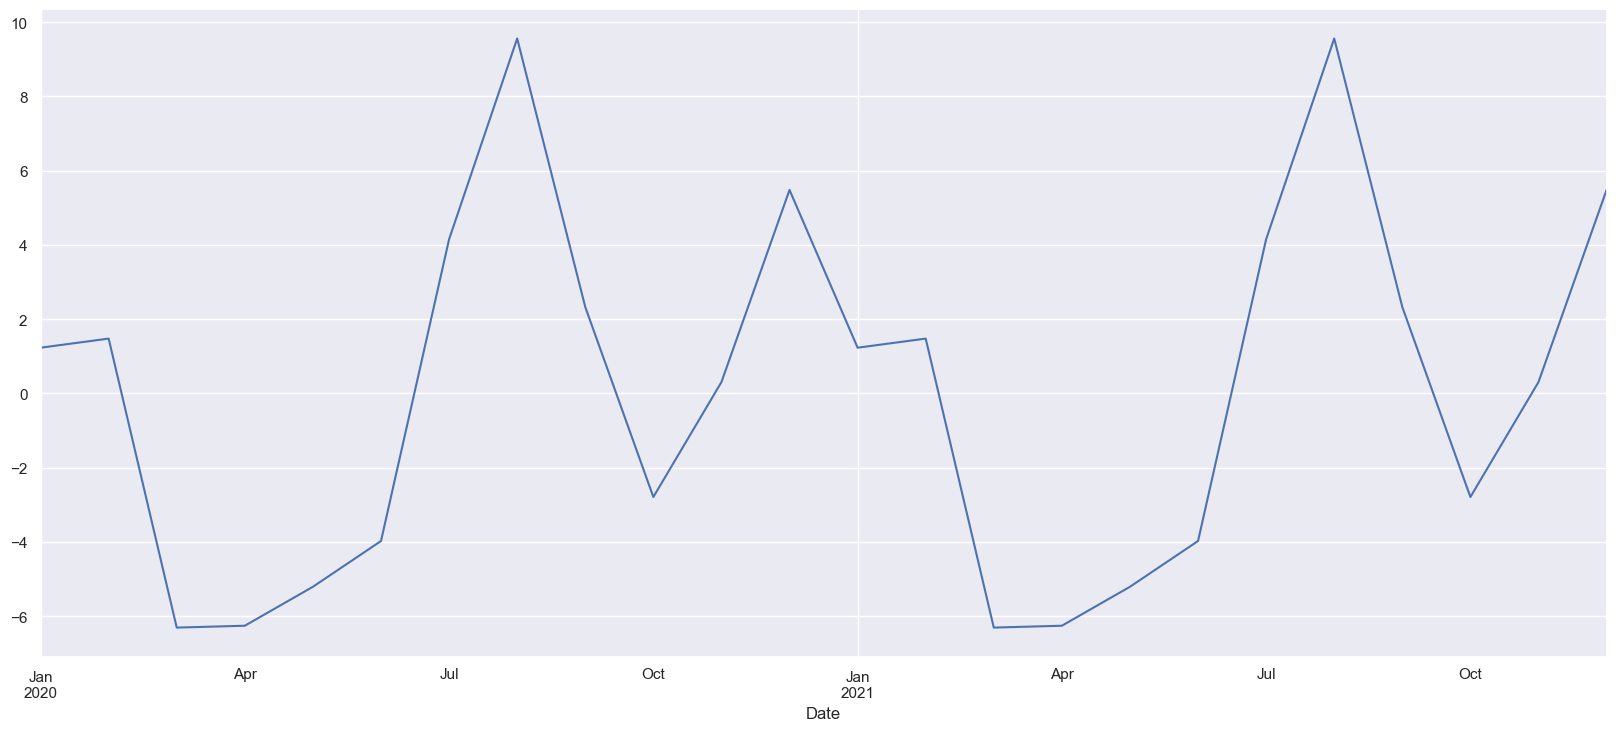

<Figure size 800x800 with 0 Axes>

In [63]:
##For better Observation of Seasonality
decomposed_series.seasonal['2020':'2021'].plot()
fig = plt.figure(figsize=(8,8))

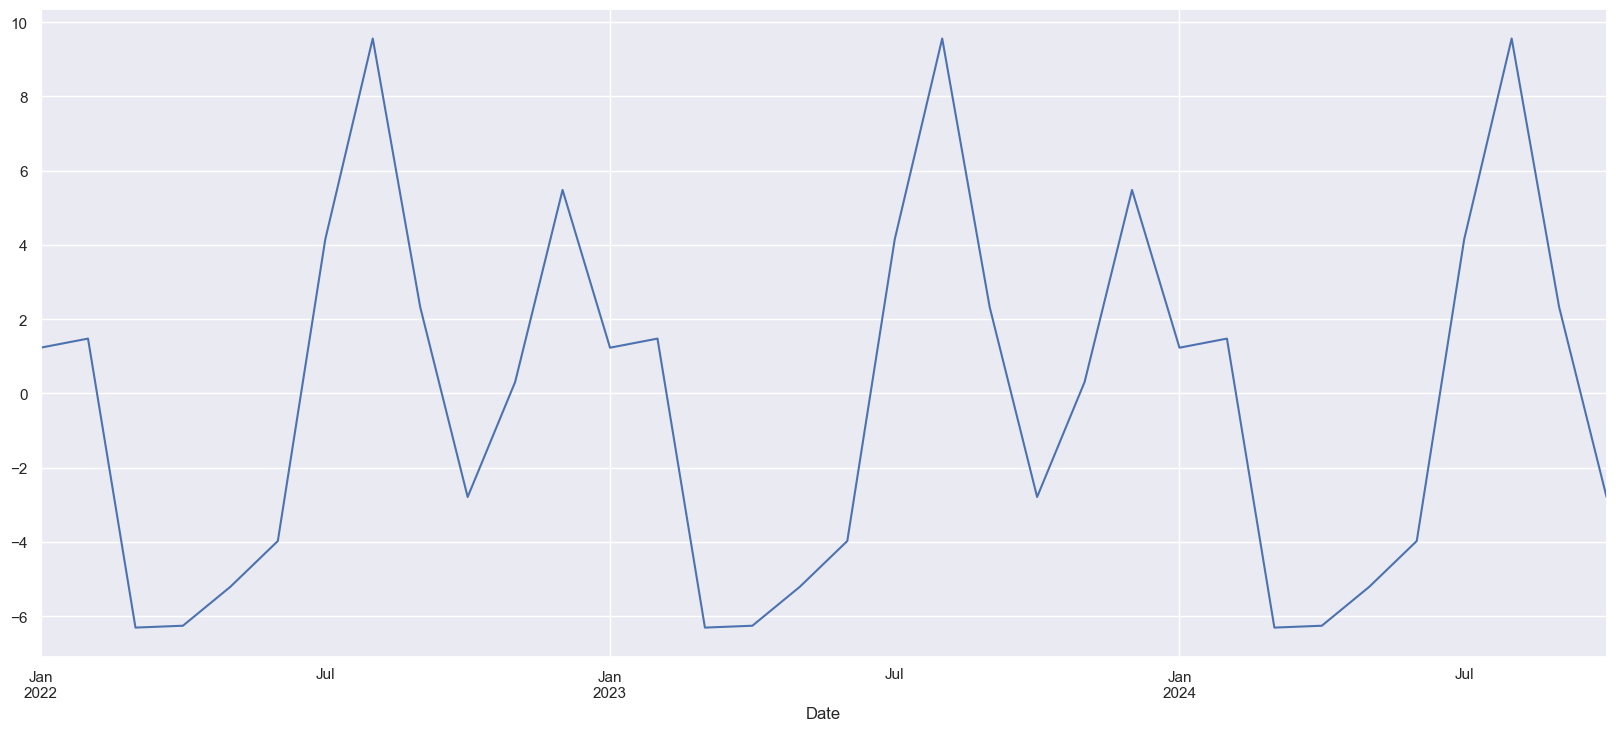

<Figure size 800x800 with 0 Axes>

In [64]:
##For better Observation of Seasonality
decomposed_series.seasonal['2022':'2024'].plot()
fig = plt.figure(figsize=(8,8))

#### Observing the above seasonality , we can say that there is a spike around the month of july

# Stationarity of Time Series

In [65]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [66]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_func(monthly_data['Close'])

ADF Statistic: -0.895726
p-value: 0.789377
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594
Failed to Reject Ho-Time Series is Non-Stationary


#### Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)


### Auto Correlation Function

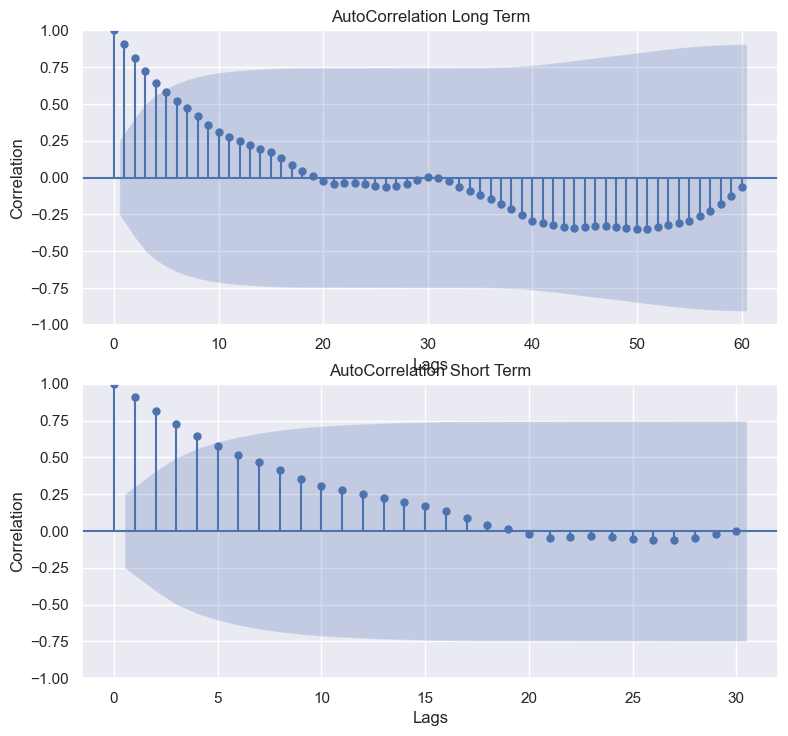

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
max_lags = min(len(monthly_data['Close']) - 1, 90)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))

# Plotting autocorrelation with max_lags for long-term view
acf = plot_acf(monthly_data['Close'], lags=max_lags, ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Plotting with a lower number of lags for short-term view
acf = plot_acf(monthly_data['Close'], lags=min(30, max_lags), ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.show()

#### This shows that the series is not random and good for time series modelling .Also tells us series is Non-stationary

## Transformations To Make Series Stationary

In [68]:
##Differencing By 1
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)

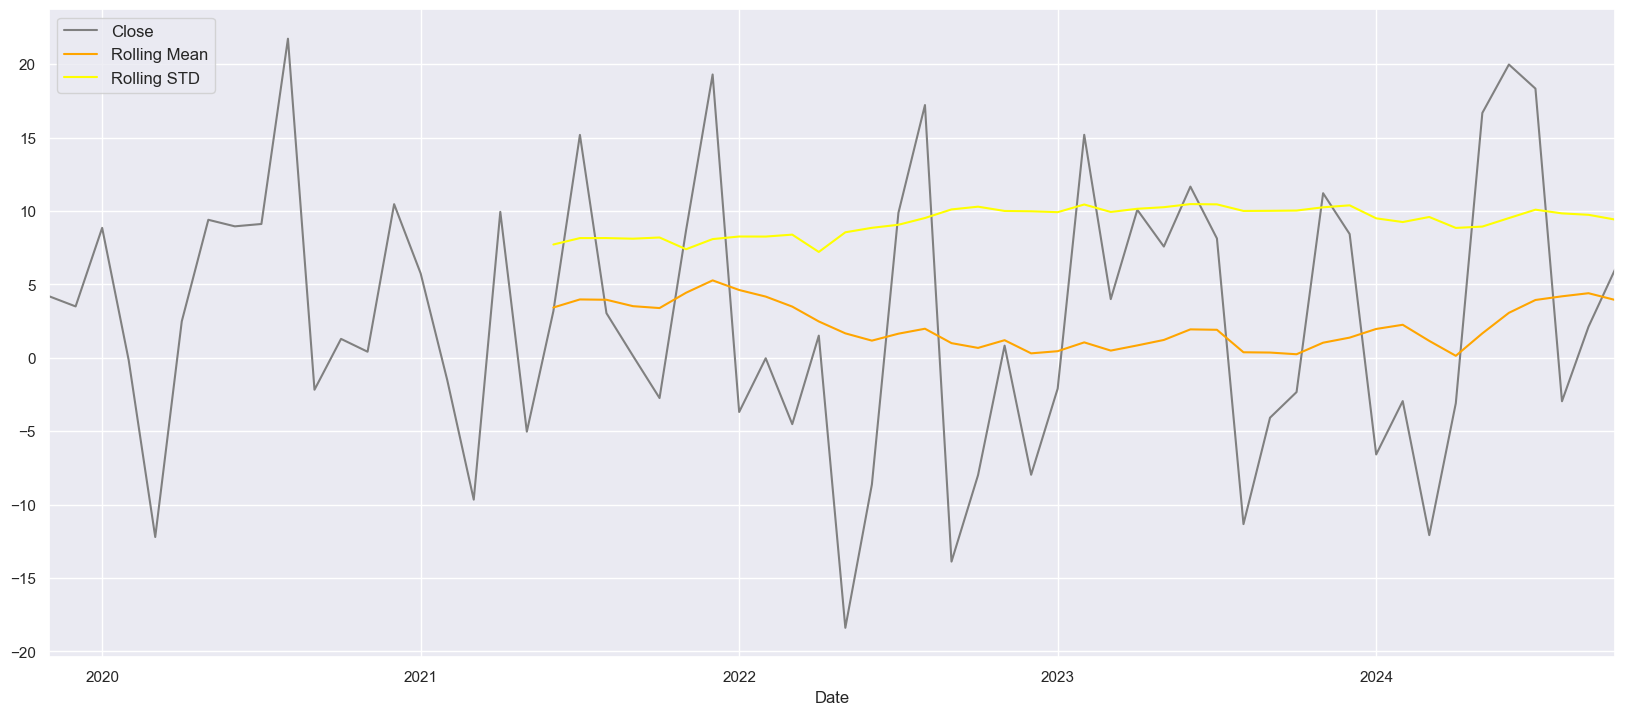

In [69]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

##### The series looks stationary as its having constant mean and variance

In [70]:
##Checking if Time Series is Stationary
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -5.936662
p-value: 0.000000
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594
Reject Null Hypothesis(Ho)-Time Series is Stationary


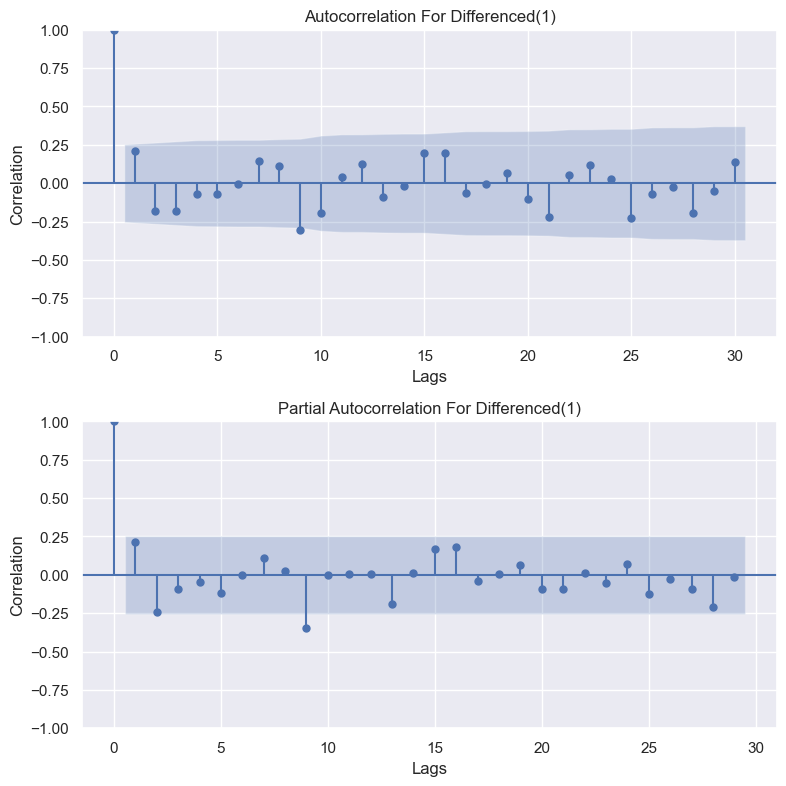

In [71]:
max_lags_pacf = int(len(monthly_diff[1:]) * 0.5) - 1

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))

# Plot ACF with 30 lags or the max possible, whichever is smaller
acf = plot_acf(monthly_diff[1:], lags=min(30, len(monthly_diff[1:]) - 1), ax=ax1)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Plot PACF with adjusted max_lags_pacf
pacf = plot_pacf(monthly_diff[1:], lags=min(30, max_lags_pacf), ax=ax2)
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout(pad=1)
plt.show()

##### According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

# Models

In [72]:
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [73]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2019-10-24,61.127499,61.200001,60.452499,60.90,58.859928,69275200,2019,10
2019-10-25,60.790001,61.682499,60.720001,61.65,59.584862,73477200,2019,10
2019-10-28,61.855000,62.312500,61.680000,62.26,60.181725,96572800,2019,10
2019-10-29,62.242500,62.437500,60.642502,60.82,58.789848,142839600,2019,10
2019-10-30,61.189999,61.325001,60.302502,60.81,58.782593,124522000,2019,10
...,...,...,...,...,...,...,...,...
2024-10-17,233.429993,233.850006,230.520004,232.15,231.894867,32993800,2024,10
2024-10-18,236.179993,236.179993,234.009995,235.00,234.741730,46431500,2024,10
2024-10-21,234.449997,236.850006,234.449997,236.48,236.220108,36254500,2024,10


# Linear Regression Model

Mean Squared Error: 8.004501744676025
R-squared: 0.982112368601894


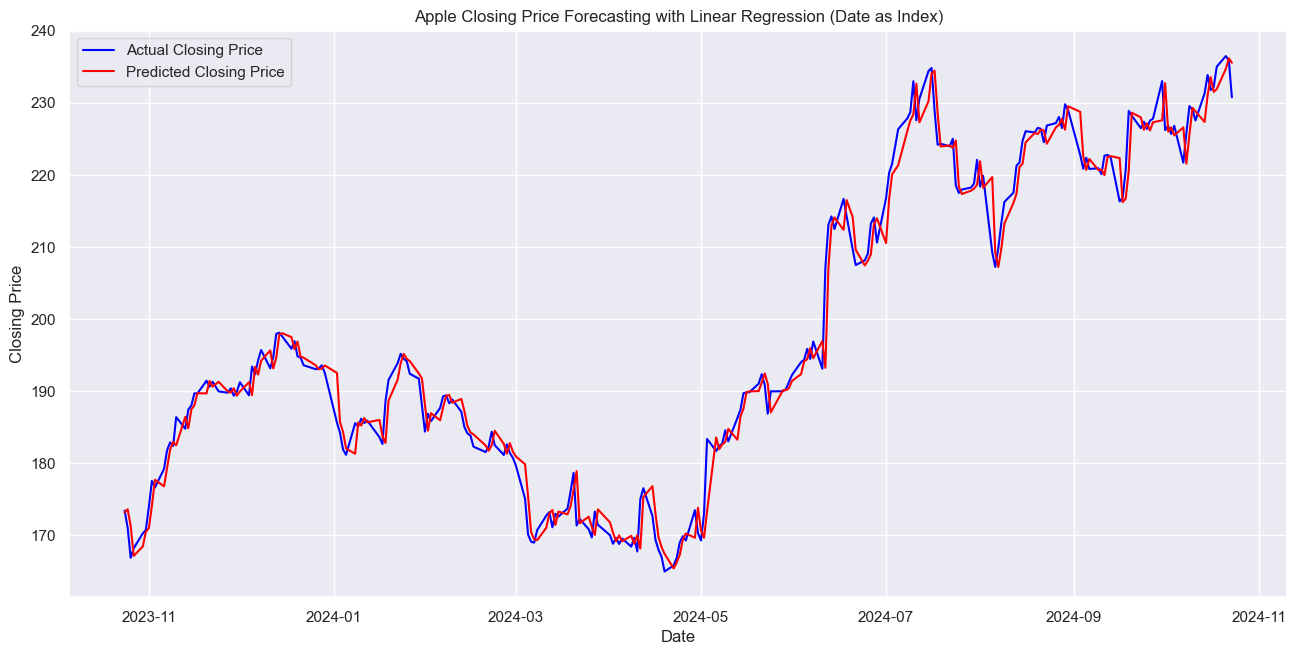

In [74]:
# Ensure the index is datetime type
apple_data.index = pd.to_datetime(apple_data.index)

# Convert index to ordinal
apple_data['Date_Ordinal'] = apple_data.index.map(lambda x: x.toordinal())

# Use previous day's close as feature
apple_data['Prev_Close'] = apple_data['Close'].shift(1)
apple_data.dropna(inplace=True)  # Drop NaN values from shifting

# Define features (X) and target (y)
X = apple_data[['Date_Ordinal', 'Prev_Close']]
y = apple_data['Close']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model_l = LinearRegression()
model_l.fit(X_train, y_train)

# Predict on the test set
y_pred = model_l.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted prices
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Closing Price Forecasting with Linear Regression (Date as Index)")
plt.legend()
plt.show()

In [35]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Date_Ordinal,Prev_Close
Date,,,,,,,,,,
2019-10-25,60.790001,61.682499,60.720001,61.65,59.584862,73477200,2019,10,737357,60.90
2019-10-28,61.855000,62.312500,61.680000,62.26,60.181725,96572800,2019,10,737360,61.65
2019-10-29,62.242500,62.437500,60.642502,60.82,58.789848,142839600,2019,10,737361,62.26
2019-10-30,61.189999,61.325001,60.302502,60.81,58.782593,124522000,2019,10,737362,60.82
2019-10-31,61.810001,62.292500,59.314999,62.19,60.111641,139162000,2019,10,737363,60.81
...,...,...,...,...,...,...,...,...,...,...
2024-10-17,233.429993,233.850006,230.520004,232.15,231.894867,32993800,2024,10,739176,231.78
2024-10-18,236.179993,236.179993,234.009995,235.00,234.741730,46431500,2024,10,739177,232.15
2024-10-21,234.449997,236.850006,234.449997,236.48,236.220108,36254500,2024,10,739180,235.00


# KNN

Mean Squared Error: 351.62766277777746
R-squared: 0.21421892058054692


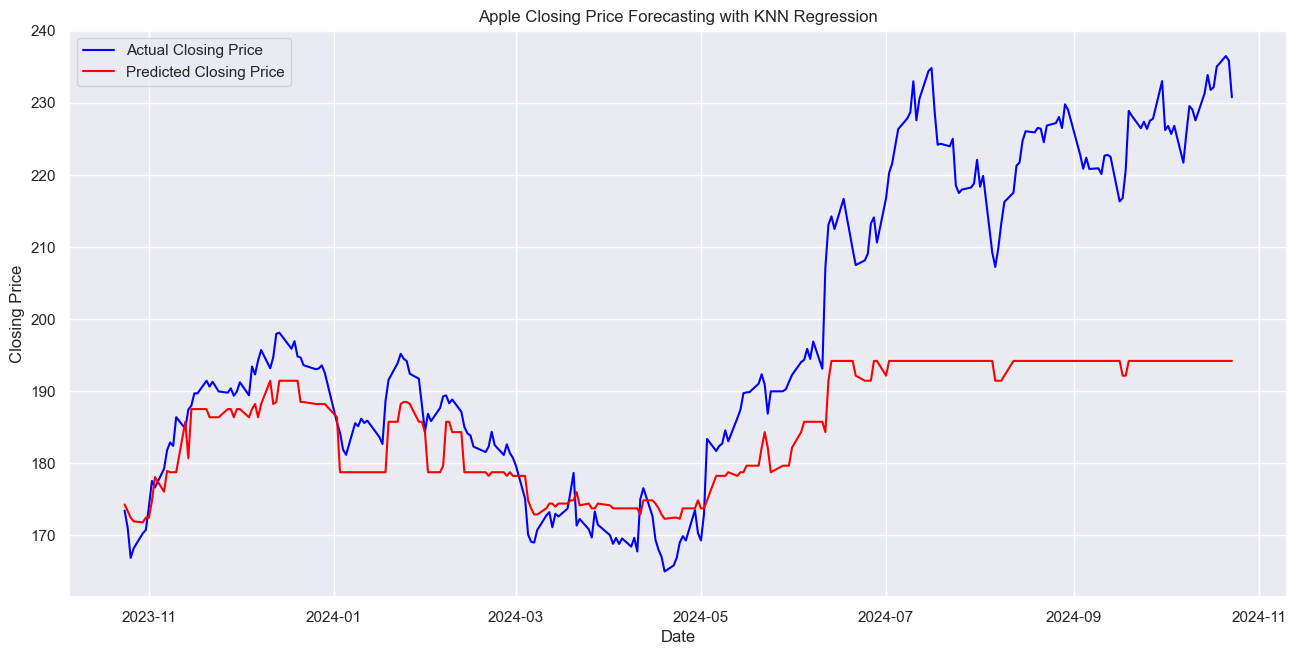

In [36]:
# Standardize the features (KNN works better with standardized features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Closing Price Forecasting with KNN Regression")
plt.legend()
plt.show()


# SVM

Mean Squared Error: 1991.1179803531627
R-squared: -3.4495442238347973


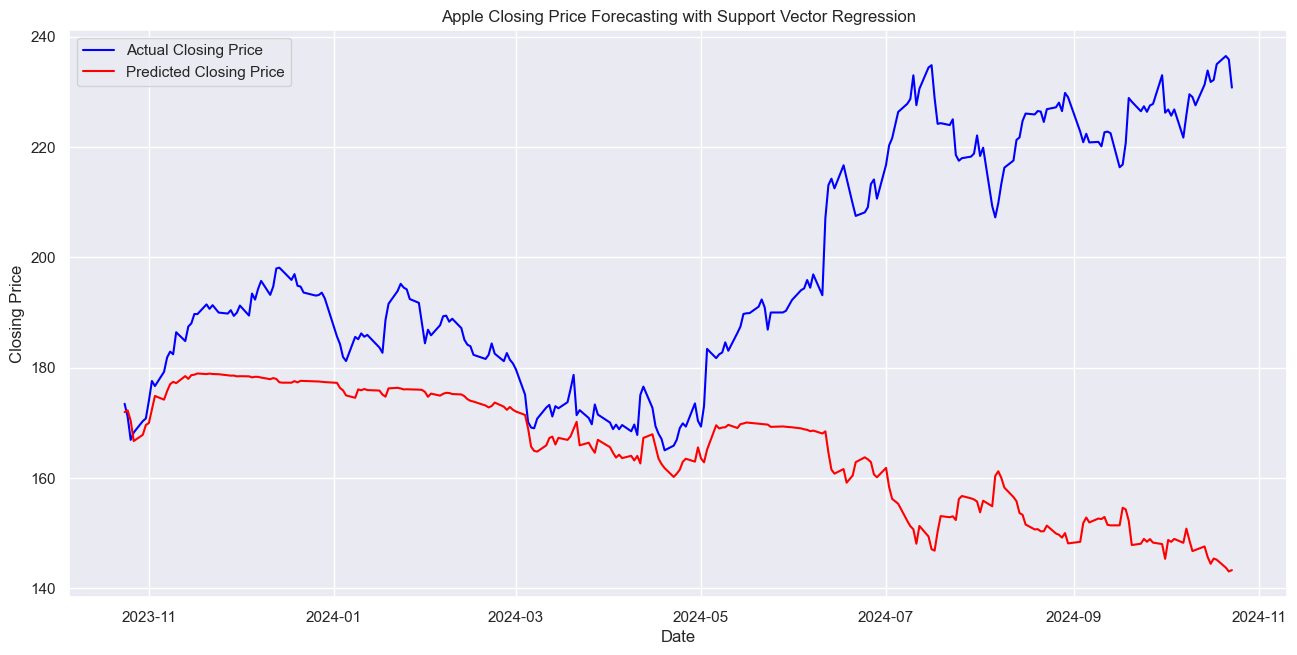

In [37]:
# Initialize and train the SVM model
svm_model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Closing Price Forecasting with Support Vector Regression")
plt.legend()
plt.show()

# SARIMAX

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1257
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3012.995
Date:                            Mon, 06 Jan 2025   AIC                           6035.990
Time:                                    22:53:22   BIC                           6061.620
Sample:                                         0   HQIC                          6045.627
                                           - 1257                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6172      0.431      1.432      0.152      -0.227       1.462
ma.L1         -0.6436      0.421   

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


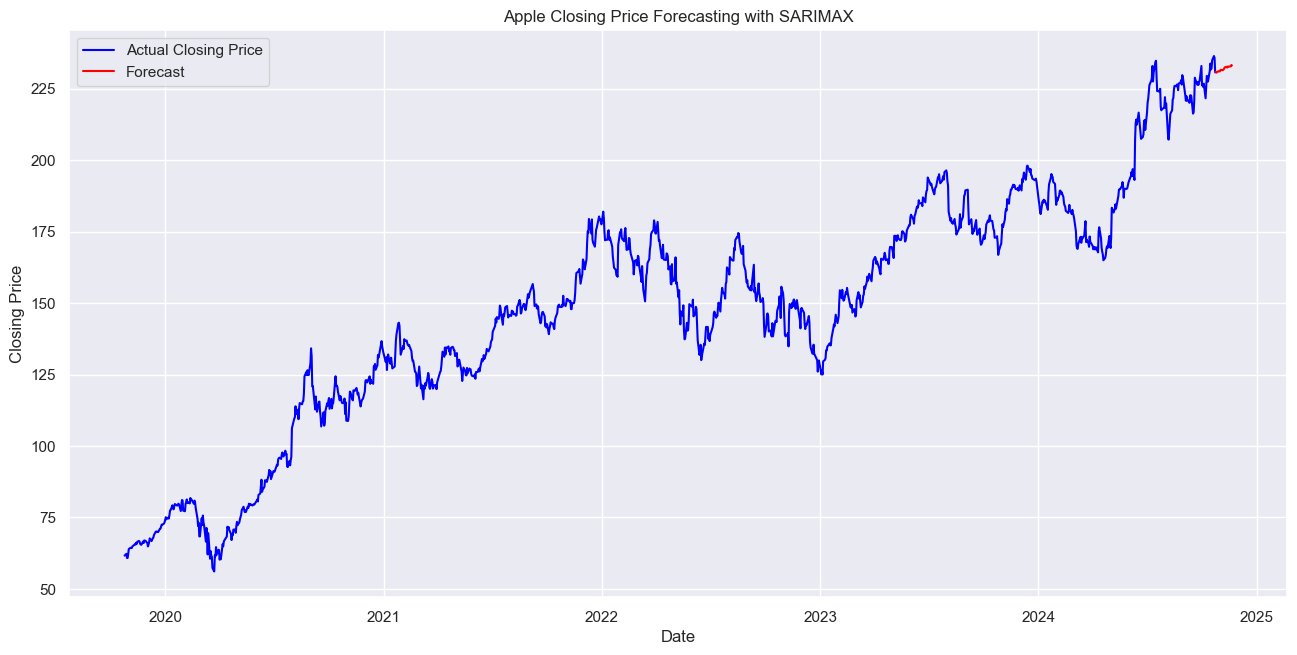

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [38]:
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s), where s is the seasonal period (12 for monthly data)

# Fit the SARIMAX model
model = SARIMAX(apple_data['Close'], order=order, seasonal_order=seasonal_order)
sarimax_model = model.fit(disp=False)

# Print the model summary
print(sarimax_model.summary())

# Make predictions
# Create a forecast for the next 20 days
forecast_steps = 20
forecast = sarimax_model.forecast(steps=forecast_steps)

# Plot the actual closing prices and the forecast
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Close'], label='Actual Closing Price', color='blue')
plt.plot(pd.date_range(start=apple_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B'), forecast, label='Forecast', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Closing Price Forecasting with SARIMAX")
plt.legend()
plt.show()

# Model Evaluation on the training data
train_size = int(len(apple_data) * 0.8)
train, test = apple_data['Close'][:train_size], apple_data['Close'][train_size:]

# Fit the model on the training set
sarimax_model_train = SARIMAX(train, order=order, seasonal_order=seasonal_order).fit(disp=False)

# Predictions on the test set
predictions = sarimax_model_train.predict(start=test.index[0], end=test.index[-1])

# Calculate evaluation metrics
mse = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Closing Price', color='blue')
plt.plot(test.index, predictions, label='Predicted Closing Price', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Closing Price Prediction with SARIMAX")
plt.legend()
plt.show()

In [39]:
from datetime import timedelta

# Get the last date in the dataset and the last closing price
last_date = apple_data['Date'].iloc[-1]
last_date_ordinal = apple_data['Date_Ordinal'].iloc[-1]
last_close = apple_data['Close'].iloc[-1]

# Generate future dates and corresponding Date_Ordinal values
future_dates = [last_date + timedelta(days=i) for i in range(1, 11)]
future_date_ordinals = [date.toordinal() for date in future_dates]

# Prepare the data for the next 10 days
future_data = pd.DataFrame({
    'Date_Ordinal': future_date_ordinals,
    'Prev_Close': [last_close] + [None] * 9  # Use last close price for the first prediction
})

# Predict the closing price for each future day sequentially
predictions = []
for i in range(10):
    # Prepare feature set
    X_future = future_data[['Date_Ordinal', 'Prev_Close']].iloc[i:i+1]
    # Predict the next closing price
    predicted_close = model.predict(X_future)[0]
    predictions.append(predicted_close)
    
    # Update future_data with the predicted close for next day's 'Prev_Close'
    if i + 1 < 10:
        future_data.at[i + 1, 'Prev_Close'] = predicted_close

# Output the predictions
future_data['Predicted_Close'] = predictions
print("Predictions for the next 10 days:")
print(future_data[['Date_Ordinal', 'Predicted_Close']])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Date'].iloc[-len(y_test):], y_test, label='Actual Closing Price', color='blue')
plt.plot(apple_data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Closing Price', color='red')
plt.plot(future_dates, predictions, label='10-Day Forecast', color='green')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Apple Closing Price Forecasting with Linear Regression (Including 10-Day Forecast)")
plt.legend()
plt.show()

KeyError: 'Date'

In [75]:
import pickle

# Save the Linear Regression model
filename = 'model_AAPL.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_l, file)

